# Методы численного вычисления значения $\pi$

Первые 50 знаков матниссы числа $\pi$:

3.14159265358979323846264338327950288419716939937510

Источник: [Wikipedia](https://en.wikipedia.org/wiki/Pi)


Библиотека `NumPy` использует значение $\pi$ с точностью до 15 знака -- достаточно для цели нашего исследования.

In [3]:
import numpy as np

In [4]:
np.pi

3.141592653589793

## Метод прямоугольников

In [5]:
def pi_rectangles(num_intervals: int) -> tuple[np.float64, np.float64]:
    """Вычисление значения pi методом прямоугольников.
    
    Аргумент:
        num_intervals -- количество интервалов аргумента
        
    Возвращаемые значения:
        1) значение pi
        2) оценка ошибки вычисления
    """
    if num_intervals == 0:
        return np.NaN, np.NaN
    
    dx = np.double(1.0) / num_intervals
    x = np.linspace(0, 1, num_intervals, endpoint=False)
    y = np.sqrt(1 - x**2)
    ds = y * dx
    pi = np.sum(ds) * 4
    return pi, pi - np.pi

In [8]:
for n in [1, 10, 100, 1000, 10000, 100000, 1000000]:
    print(n, pi_rectangles(n))

1 (4.0, 0.8584073464102069)
10 (3.304518326248318, 0.16292567265852487)
100 (3.160417031779045, 0.018824378189251867)
1000 (3.1435554669110277, 0.001962813321234602)
10000 (3.1417914776113225, 0.00019882402152937573)
100000 (3.1416126164019866, 1.996281219351914e-05)
1000000 (3.1415946524138105, 1.9988240174129146e-06)


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
pi_n = []
err_n = []
ns = np.arange(1000,1000001,1000, dtype=int)
for n in ns:
    pi, err = pi_rectangles(n)
    pi_n.append(pi)
    err_n.append(err)


In [25]:
x = np.linspace(0, 1, 100, endpoint=True)
y = np.sqrt(1 - x**2)

In [42]:
xr = np.linspace(0, 1, 5, endpoint=False)
yr = np.sqrt(1 - xr**2)

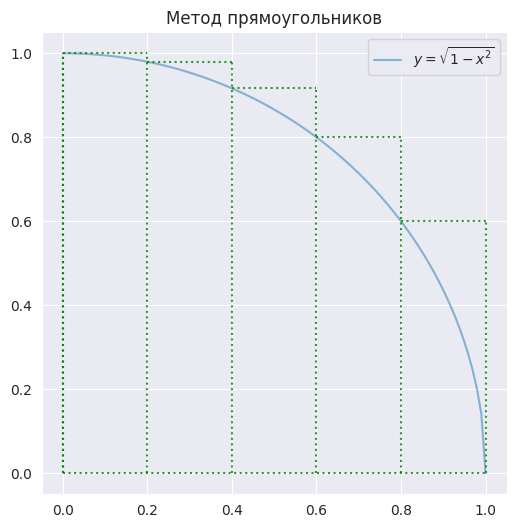

In [91]:
fig, ax = plt.subplots(figsize=(6, 6))
sb_ax = sns.lineplot(y=y, x=x,alpha=0.5, label="$y = \sqrt{1 - x^2}$")
sb_ax.set(title="Метод прямоугольников")
ax.set_xlim(-0.05,1.05)
ax.set_ylim(-0.05,1.05)
sb_ax.hlines(
    y=yr,
    xmin=xr[:],
    xmax=[*xr[1:], 1.0],
    colors='green',
    linestyles='dotted',
    alpha=0.8,
)
sb_ax.vlines(
    x=[*xr, 1.0],
    ymin=0,
    ymax=[1.0, *yr[:]],
    colors='green',
    linestyles='dotted',
    alpha=0.8,
)
ax.vlines(
    x=0.0,
    ymin=0,
    ymax=1.0,
    colors='green',
    linestyles='dotted',
    alpha=0.8,
)
ax.hlines(
    y=0.0,
    xmin=0,
    xmax=1.0,
    colors='green',
    linestyles='dotted',
    alpha=0.8,
)

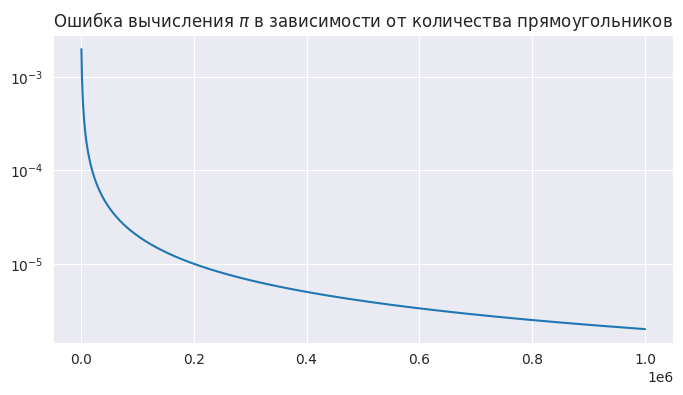

In [13]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.set_style('darkgrid')
ax = sns.lineplot(y=err_n, x=ns).set( 
    title="Ошибка вычисления $\pi$ в зависимости от количества прямоугольников")
# ax.axhline(0, xmin=0, xmax=1000, color='green');
plt.yscale('log')